In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df_no_dup = df.drop(df.index[df.App.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(df_no_dup.shape[0]))

There are 1181/10841 duplicated records.
9660 records after dropping duplicated.


In [7]:
print(set(df_no_dup.Type))
print("Dropping alien Type value '0', {} record(s) removed".format(sum(df_no_dup.Type == '0')))
df_no_dup = df_no_dup.drop(df_no_dup.index[df_no_dup.Type == '0'], axis=0)

{'Free', nan, '0', 'Paid'}
Dropping alien Type value '0', 1 record(s) removed


In [8]:
print("NaA value statistics in each column")
print(df_no_dup.isnull().sum(axis=0),'\n')
df_no_dup = df_no_dup.dropna(subset=['Type'])
print("Column 'Type' with NaN values are dropped, {} records left.".format(df_no_dup.shape[0]))

NaA value statistics in each column
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64 

Column 'Type' with NaN values are dropped, 9658 records left.


In [9]:
df_rating = df_no_dup.dropna(subset=['Rating'])
print("Cleaned dataframe for 'Rating' has {} records.".format(df_rating.shape[0]))

Cleaned dataframe for 'Rating' has 8196 records.


In [10]:
df_rating = df_rating.loc[:,['Rating', 'Type', 'Category']]

In [11]:
def plot_hist(df, col, bins=10):
    """
    Plot histograms for a column
    """
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.title('Distribution of {}'.format(col))

In [12]:
def compute_app_types(df):
    
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

In [14]:
def plot_app_types(df):
    
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


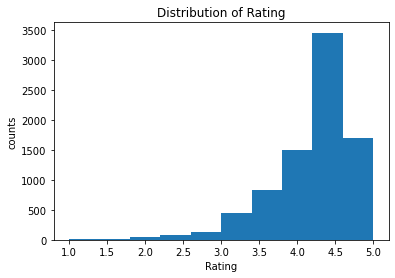

In [15]:
 plot_hist(df_rating, 'Rating')
 df_rating.describe()

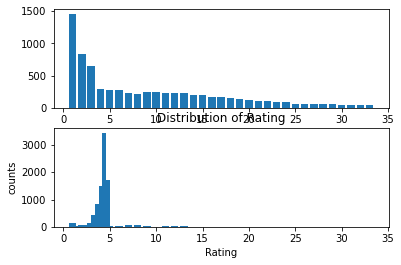

In [16]:
plot_app_types(df_rating)


In [17]:
df_rating.describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Free app has average Rating 4.1663724973656535
Paid app has average Rating 4.259602649006619
Mean rating: 4.173243045387998


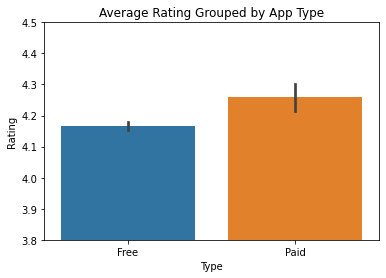

In [20]:
def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))    
    return stats
    
stats = plot_target_by_group(df_rating, 'Rating', 'Type', title="Average Rating Grouped by App Type")
for i, s in zip(stats.index, stats):
    print("{} app has average {} {}".format(i, 'Rating',s))
mean_rating = df_rating.Rating.mean()
print("Mean rating: {}".format(mean_rating))